|  |  |  |
| ---: | :--- | :--- |
| Курс:| Исследовательский анализ данных | 02 |
| Срок обучения на момент сдачи: | 4 недели |

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Содержание

1  [Вводные данные и постановка задачи](#1)

1. Импорт библиотек, изучение информации, определение проблем
2. Предобработка:
  * ошибки и формат
  * Выбросы обозначить как NaN для дальнейшего анализа показателей для NaN и ошибок
  * создать столбец с количеством NaN в строке (кроме полей заполняемых автоматически).
  * заполнить пропуски где возможно.
3. Формирование недостающих столбцов:
  * цена за м2
  * день недели, месяц и год публикации объявления
  * этаж - первый / последний / другой
  * отношение жилой к общей и кухни к общей площади
4. Анализ
  * площадь
  * цена
  * число комнат
  * высота потолков
  * время продажи
  * этаж
  * дата размещения
  * населенный пункт
  * расстояние до центра
4. Ответы на вопросы, выводы

<a name="1"></a>
## Вводные данные и постановка задачи

### Описание данных

* total_images         23699 non-null int64    — число фотографий квартиры в объявлении
* last_price           23699 non-null float64  — цена на момент снятия с публикации
* total_area           23699 non-null float64  — площадь квартиры в квадратных метрах (м²)
* first_day_exposition 23699 non-null object   — дата публикации
* rooms                23699 non-null int64    — число комнат
* ceiling_height       14504 non-null float64  — высота потолков (м)
* floors_total         23613 non-null float64  — всего этажей в доме 
* living_area          21796 non-null float64  — жилая площадь в квадратных метрах(м²)
* floor                23699 non-null int64    — этаж
* is_apartment         2775  non-null object   — апартаменты (булев тип)
* studio               23699 non-null bool     — квартира-студия (булев тип)
* open_plan            23699 non-null bool     — свободная планировка (булев тип)
* kitchen_area         21421 non-null float64  — площадь кухни в квадратных метрах (м²)
* balcony              12180 non-null float64  — число балконов
* locality_name        23650 non-null object   — название населённого пункта
* airports_nearest     18157 non-null float64  — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest  18180 non-null float64  — расстояние до центра города (м)
* parks_around3000     18181 non-null float64  — число парков в радиусе 3 км
* parks_nearest        8079  non-null float64  — расстояние до ближайшего парка (м)
* ponds_around3000     18181 non-null float64  — число водоёмов в радиусе 3 км
* ponds_nearest        9110  non-null float64  — расстояние до ближайшего водоёма (м)
* days_exposition      20518 non-null float64  — сколько дней было размещено объявление (от публикации до снятия)

### Инструкция по выполнению проекта

*В этом проекте задачи сформулированы в виде подробной инструкции.*

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Предобработка данных

*    определите и изучите пропущенные значения, где возможно предположите логичную замену.
*    приведите данные к нужным типам

Шаг 3. Посчитайте и добавьте в таблицу:

*    цену квадратного метра;
*    день недели, месяц и год публикации объявления;
*    этаж квартиры; варианты — первый, последний, другой;
*    соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

*    Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
*    Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
*    Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
*    Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
*    Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
*    Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
*    Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Шаг 5. Напишите общий вывод

<a name="2"></a>
## Импорт библиотек, загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t') #данные разделены с помощью \
data.info()
#data.describe()
display(data.head(5))
print()
print('дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



дубликатов: 0


**Предварительный вывод по данным:**

Данные "сырые", есть пропуски, выбросы. Дубликатов нет. 

* rooms - 197 строк с rooms=0 часть - студии, часть - со свободной планировкой - вероятно необходимо оставить нулевые значения
* living_area - 1903 пропуска. Корректно заполнить нечем. Для формирования столбца living/total_area и последующего анализа строки с пропусками использовать не будем.
* kitchen_area - 2278 пропуска. Корректно заполнить нечем. Для формирования столбца kitchen/total_area и последующего анализа строки с пропусками использовать не будем.
* Не для всех объектов подтянулись картографические данные: есть пропуски в столбцах: 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'. 
* Много пропусков в 'parks_nearest', 'ponds_nearest' - вероятно они обозначают отсутствие парков и водоемов в заданном радиусе от объекта.

## Предобработка данных

### Выявление пропусков и явных выбросов

*Часть пропусков не обработана умышленно. Посмотрим выделяются ли объявления с пропусками и ошибками.*

**is_apartment**

In [3]:
print('Количество пропусков в "is_apartment":', data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

Количество пропусков в "is_apartment": 20924


False    2725
True       50
Name: is_apartment, dtype: int64

* 20924 пропусков 

заполним False т.к. такая важная деталь как нежилой статус объекта скорее всего указана для апартаментов и может быть опущена для жилого фонда.

In [4]:
data['is_apartment'] = data['is_apartment'].fillna(False) #Апартаменты в пропущенных ячейках = False

**balcony**

In [5]:
print('Количество пропусков в "balcony":', data['balcony'].isna().sum())
data['balcony'].value_counts()

Количество пропусков в "balcony": 11519


1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

* 11519 пропусков - почти половина. Заполним 0 т.к. пропуск вероятно говорит об отсутствии балконов. 
* встречаются ошибки (например 5 балконов для однокомнатной квартиры с небольшой площадью) 

значения меняем на NaN для дальнейшего анализа строк с ошибками и пропусками.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64') #переведем в int

def balcony_range(row):
    '''
    принимает строку и возвращает NaN если балконов > чем комнат + 1(кухня) 
    исключения - апартаменты, студии и квартиры больше 100 м2
    '''
    if row['balcony']>row['rooms']+1 and row['is_apartment']!=True and row['studio']!=True and row['total_area']<100:
        return np.NaN
    return row['balcony']

data['balcony'] = data.apply(balcony_range, axis=1) #присваиваем выбросам в balcony NaN - 292 выброса

**ceiling_height**

In [7]:
print('Количество пропусков в "ceiling_height":', data['ceiling_height'].isna().sum())
data['ceiling_height'].describe()

Количество пропусков в "ceiling_height": 9195


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

* 9195 пропусков 
* встречаются ошибки (значения <2 или >5)

**days_exposition**

In [8]:
print('Количество пропусков в "days_exposition":', data['days_exposition'].isnull().sum())
data['days_exposition'].describe()

Количество пропусков в "days_exposition": 3181


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

3181 пропуск, а также крайние 4 строки со значением <3 можно удалить.

In [9]:
data = data.query('days_exposition>2') #удаляем строки со сроком публикации < 3

**last_price**

In [10]:
data['last_price'].describe()

count    2.051400e+04
mean     6.266323e+06
std      1.086401e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Явный выброс 12190 - удалить, остальные удобнее анализировать в млн. руб.

In [11]:
data = data.query('last_price>100000') #удаляем выброс с ценой < 100тыс.
data['last_price']/=1000000 #цены в млн. руб.

**locality_name**

In [12]:
print('Количество пропусков в "locality_name":', data['locality_name'].isnull().sum())
data['locality_name'].value_counts().head(10)

Количество пропусков в "locality_name": 48


Санкт-Петербург      13633
посёлок Мурино         517
посёлок Шушары         408
Всеволожск             339
Колпино                308
Пушкин                 307
посёлок Парголово      302
деревня Кудрово        299
Гатчина                268
Выборг                 208
Name: locality_name, dtype: int64

49 пропусков - строки необходимо удалить

Присутствует разное написание для одного и тогоже населенного пункта: 
* Мурино/поселок Мурино/посёлок Мурино
* Кудрово/деревня Кудрово

Для проекта важны только топ-10 поэтому можно "посмотреть глазами" только их. Если и есть другие "задвоенные" варианты написания то на топ-10 они не повлияют.

In [13]:
data=data.dropna(subset=['locality_name']) #удаляем строки с пропусками в locality_name

data['locality_name']=data['locality_name'].replace('поселок Мурино', 'Мурино') #приводим locality_name к единому виду
data['locality_name']=data['locality_name'].replace('посёлок Мурино', 'Мурино')
data['locality_name']=data['locality_name'].replace('деревня Кудрово', 'Кудрово')

**first_day_exposition** - необходимо перевести в формат даты для дальнейшей обработки

In [14]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

Возможно форма заполнения данных при размещении объявления требует доработки (введение обязательных полей, проверка вводимых значений по формату и диапазону, добавление возможности выбора из списка, автозаполнение).

### Добавление новых (расчетных) параметров

In [15]:
data['m2_price'] = round(data['last_price']*1000000/data['total_area'])  #стоимость м2

In [16]:
data['weekday'] = data['first_day_exposition'].dt.weekday #день недели
data['month'] = data['first_day_exposition'].dt.month     #месяц
data['year'] = data['first_day_exposition'].dt.year       #год

In [17]:
def floor_type(row):
    '''
    принимает строку, возвращает тип этажа квартиры
    '''
    try:
        if row['floor']==1:
            return 'первый'
        if row['floors_total']/row['floor']==1:
            return 'последний'
        return 'другой'
    except: 
        return np.NaN

data['floor_type']=data.apply(floor_type, axis=1)

In [18]:
def living_total(row):
    '''
    принимает строку, возвращает соотношение жилой и общей площади
    '''
    try:
        return row['living_area']/row['total_area']
    except: 
        return np.NaN

data['living_total']=data.apply(living_total, axis=1)

In [19]:
def kitchen_total(row):
    '''
    принимает строку, возвращает отношение площади кухни к общей площади
    '''
    try:
        return row['kitchen_area']/row['total_area']
    except: 
        return np.NaN

data['kitchen_total']=data.apply(kitchen_total, axis=1)

Дополнительно можно проанализировать дату снятия объявления.

In [20]:
#дата снятия объявления
data['end_data'] = data['first_day_exposition'] + data['days_exposition'].astype('timedelta64[D]')

In [21]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,m2_price,weekday,month,year,floor_type,living_total,kitchen_total,end_data
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,81.0,82921.0,1,12,2018,первый,0.460396,0.272277,2019-02-23
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,574.0,558.0,92786.0,3,8,2015,другой,0.612500,0.148214,2017-02-28
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,234.0,424.0,408176.0,4,7,2015,другой,NaN,NaN,2016-09-20


### Изучение площади, цены, числа комнат, высоты потолков

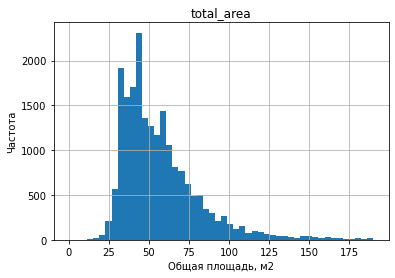

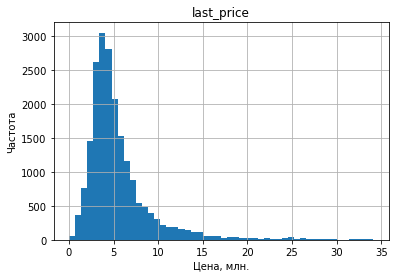

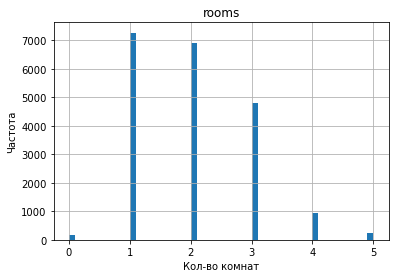

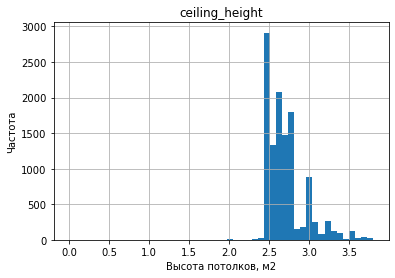

In [22]:
i=0
xlable_list = ['Общая площадь, м2', 'Цена, млн.', 'Кол-во комнат', 'Высота потолков, м2']
col_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for col in col_list:
    q99=data[col].quantile(0.99)
    data.hist(column=col, bins=50, range=(0, q99))
    plt.ylabel('Частота')
    plt.xlabel(xlable_list[i])
    i+=1
    plt.show()

In [23]:
data_4params = data.loc[:, col_list]
data_4params.describe()

,total_area,last_price,rooms,ceiling_height
count,20465.000000,20465.000000,20465.000000,12033.000000
mean,58.846030,6.265261,2.023943,2.761522
std,34.082077,10.874765,1.055077,1.264653
min,12.000000,0.430000,0.000000,1.000000
25%,39.500000,3.400000,1.000000,2.520000
50%,50.800000,4.500000,2.000000,2.650000
75%,67.800000,6.500000,3.000000,2.800000
max,900.000000,763.000000,19.000000,100.000000


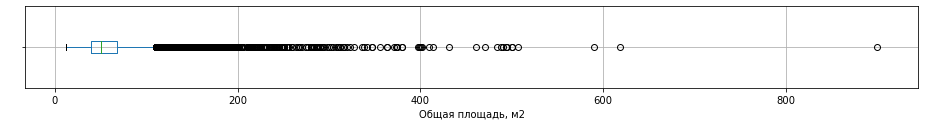

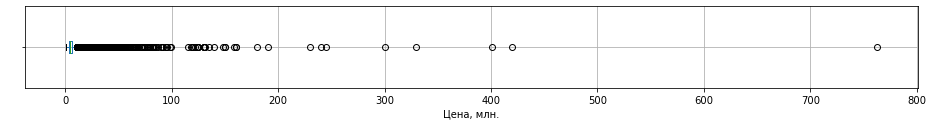

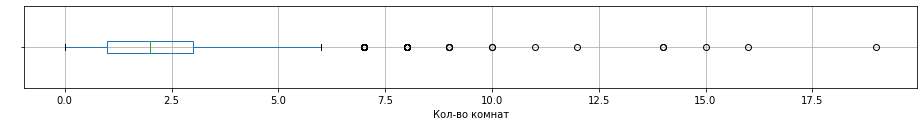

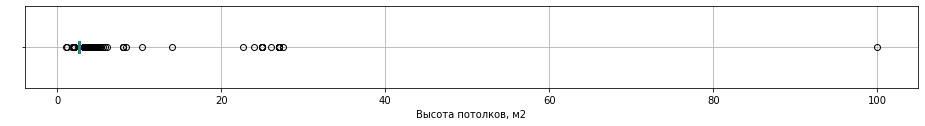

In [24]:
i=0

for col in col_list:
    data.boxplot(column=col, vert=0, figsize=(16, 1.5))
    plt.xlabel(xlable_list[i])
    plt.yticks(color='w', rotation=90)
    i+=1
    plt.show()

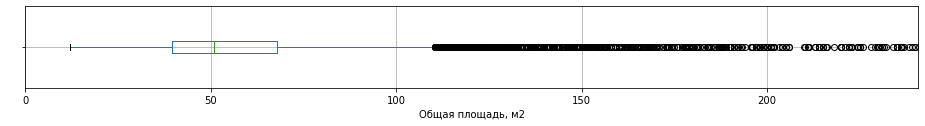

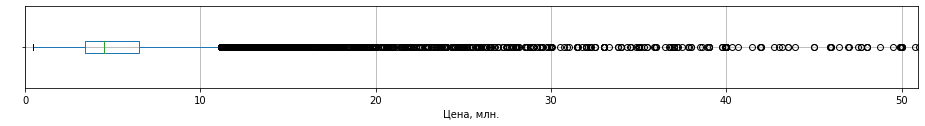

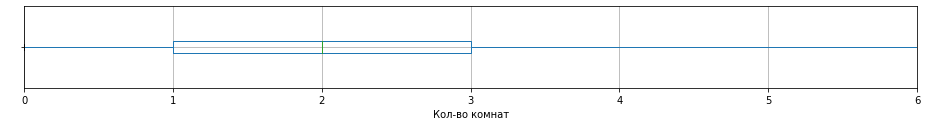

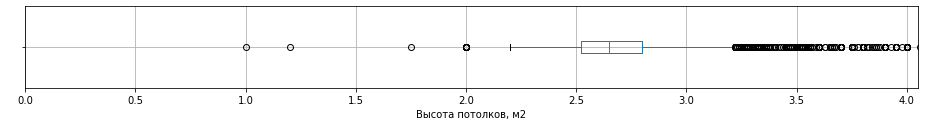

In [25]:
i=0

for col in col_list:
    q99=data[col].quantile(0.995)
    data.boxplot(column=col, vert=0, figsize=(16, 1.5))
    plt.xlabel(xlable_list[i])
    plt.yticks(color='w', rotation=90)
    plt.xlim([0,q99])
    i+=1
    plt.show()

<a name="pre"></a>
**Вывод по данным:**

Отсекать выбросы по границам "усов" или по медиане +/- три межквартильных размаха для данной задачи не целесообразно.

Считаю правильным удалить следующие строки:
*    цена более 30 млн руб. (дороже - определенно элитное жильё)
*    площадь более 300 м2. (для СПб допускаю варианты бывшей коммунальной квартиры такой площади)
*    количество комнат не трогаем (также возможна многокомнатная коммуналка)

Такая недвижимость относится к элитной и на её стоимость могут сильно влиять не учтенные в данном исследовании параметры.
    
В столбце с высотой потолков большое количество пропусков - выбросы (меньше 2 или больше 4 метров правильно ,eltn заменить на NaN).

### Влияние пропусков и ошибок  

Посмотрим как ведут себя объявления с ошибками и пропусками. Для этого выбросы заполним NaN и создадим столбец с соответствующим количеством NaN в строке (не учитывая поля заполняемые автоматически).

**Замена ошибочных значений на NaN**

In [26]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']>2, np.NaN)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<=4, np.NaN)

In [27]:
data2 = data.copy()

In [28]:
#количество пропусков и ошибок (кроме обработанных)
data2['nan_count'] = data2.loc[:, 'ceiling_height': 'balcony'].isna().sum(axis=1) 

In [29]:
print(data2['nan_count'].value_counts())
display(data2.describe())
data2['end_data2'] = data2['end_data'].dt.year + (data2['end_data'].dt.month)/12

0    10810
1     7594
2     1170
3      862
4       29
Name: nan_count, dtype: int64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday,month,year,living_total,kitchen_total,nan_count
count,20465.000000,20465.000000,20465.000000,20465.000000,11961.000000,20389.000000,18766.000000,20465.000000,18400.000000,20173.000000,...,15819.000000,7868.000000,20465.000000,2.046500e+04,20465.000000,20465.000000,20465.000000,18766.000000,18400.000000,20465.000000
mean,9.614659,6.265261,58.846030,2.023943,2.714383,10.863554,33.526914,5.987833,10.431172,0.536460,...,0.760541,520.239197,180.796628,9.802646e+04,2.585536,6.588175,2017.217542,0.562714,0.189250,0.617444
std,5.658544,10.874765,34.082077,1.055077,0.249587,6.649388,21.325337,4.940409,5.673595,0.825987,...,0.931696,277.201914,219.787194,4.773893e+04,1.783379,3.486257,0.965327,0.105347,0.072614,0.787596
min,0.000000,0.430000,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,13.000000,3.000000,7.963000e+03,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000
25%,6.000000,3.400000,39.500000,1.000000,2.520000,5.000000,18.300000,2.000000,7.000000,0.000000,...,0.000000,300.000000,45.000000,7.647100e+04,1.000000,3.000000,2017.000000,0.491935,0.135197,0.000000
50%,9.000000,4.500000,50.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,504.000000,95.000000,9.407900e+04,3.000000,7.000000,2017.000000,0.565293,0.175000,0.000000
75%,14.000000,6.500000,67.800000,3.000000,2.800000,16.000000,41.600000,8.000000,11.922500,1.000000,...,1.000000,731.000000,231.000000,1.121620e+05,4.000000,10.000000,2018.000000,0.635965,0.234375,1.000000
max,50.000000,763.000000,900.000000,19.000000,4.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879,4.000000


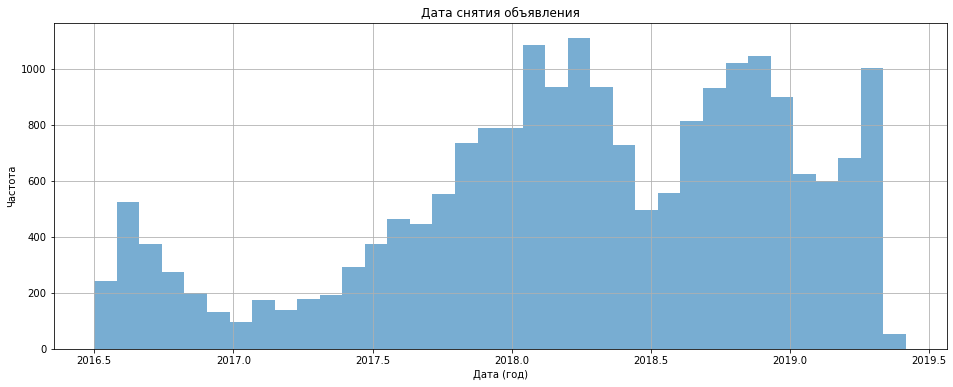

In [30]:
data2.hist(column='end_data2', bins=36, figsize=(16, 6), alpha = 0.6)
plt.title('Дата снятия объявления')
plt.ylabel('Частота')
plt.xlabel('Дата (год)')
plt.show()

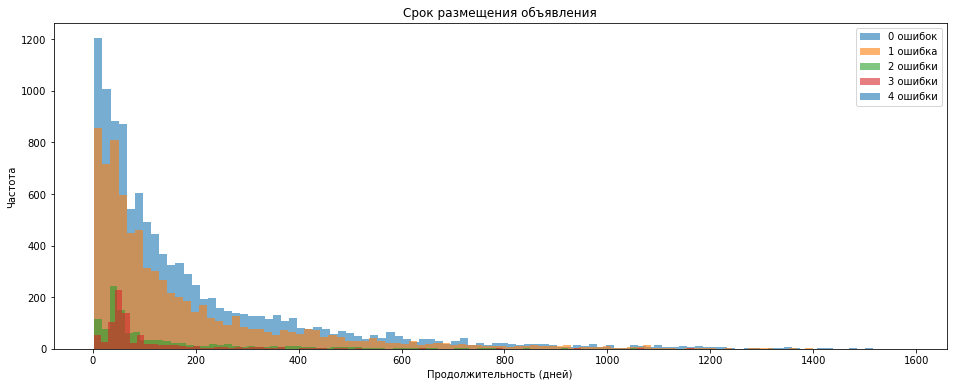

In [31]:
for N in range(0, 4):
    data3 = data2.loc[data2.loc[:, 'nan_count'] == N]
    data3['days_exposition'].plot.hist(bins=100, figsize=(16, 6), alpha = 0.6)
plt.title('Срок размещения объявления')
plt.ylabel('Частота')
plt.xlabel('Продолжительность (дней)')
plt.legend(['0 ошибок', '1 ошибка', '2 ошибки', '3 ошибки', '4 ошибки']);

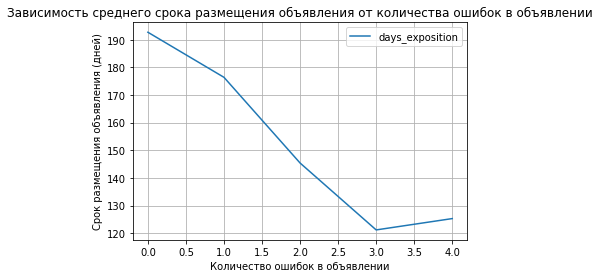

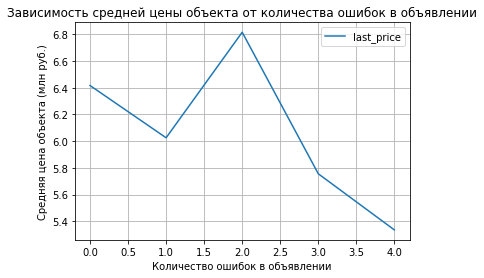

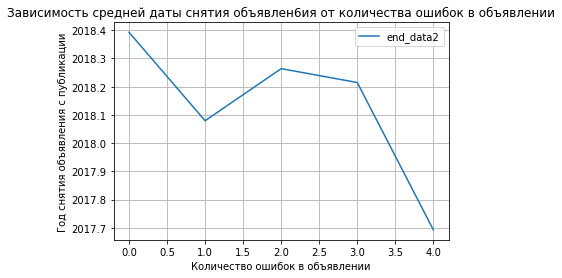

In [32]:
data2.pivot_table(index='nan_count', values='days_exposition').plot(grid=True)
plt.title('Зависимость среднего срока размещения объявления от количества ошибок в объявлении')
plt.ylabel('Срок размещения объявления (дней)')
plt.xlabel('Количество ошибок в объявлении')

data2.pivot_table(index='nan_count', values='last_price').plot(grid=True)
plt.title('Зависимость средней цены объекта от количества ошибок в объявлении')
plt.ylabel('Средняя цена объекта (млн руб.)')
plt.xlabel('Количество ошибок в объявлении')

data2.pivot_table(index='nan_count', values='end_data2').plot(grid=True)
plt.title('Зависимость средней даты снятия объявлен6ия от количества ошибок в объявлении')
plt.ylabel('Год снятия объявления с публикации')
plt.xlabel('Количество ошибок в объявлении');

Продолжительность размещения объявления для объектов с ошибками в среднем меньше. При этом не известен результат по объекту (продан, был снят с публикации и размещен повторно без ошибок). 

0-2 ошибки характерны для квартир стоимостью 6-7 млн., 
3-4 ошибки для квартир стоимостью 5-6 млн. 
Внимательность и аккуратность при размещении объявления ниже для менее дорогих объектов.

Колличество ошибок в целом с течением врепмени снижается.

### Продолжительность размещения объявления

count    20465.000000
mean       180.796628
std        219.787194
min          3.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64



Text(0.5, 0, 'Продолжительность (дней)')

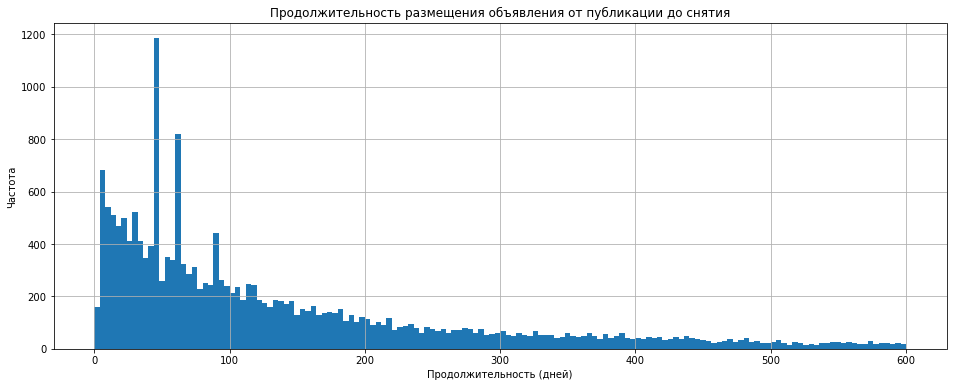

In [33]:
print(data['days_exposition'].describe())#продолжительность размещения объявления от публикации до снятия
print()
data['days_exposition'].hist(bins=150, range=(0, 600), figsize=(16, 6)); #время продажи
plt.title('Продолжительность размещения объявления от публикации до снятия')
plt.ylabel('Частота')
plt.xlabel('Продолжительность (дней)')

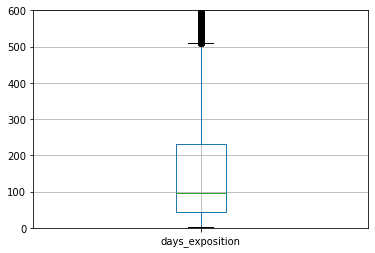

In [34]:
plt.ylim(0, 600)
data.boxplot(column='days_exposition');

In [35]:
print('Среднее время продажи:', data['days_exposition'].mean()//1)
print('Медианное время продажи:', data['days_exposition'].median())
print('продажи быстрее', data['days_exposition'].quantile(0.25)//1, 'дней можно считать быстрыми')
print('продажи медленнее', data['days_exposition'].quantile(0.75), 'дней можно считать долгими')
iqr=data['days_exposition'].quantile(0.75)-data['days_exposition'].quantile(0.25)
print('продажи медленнее', data['days_exposition'].quantile(0.75)+1.5*iqr, 'дней можно считать крайне долгими')

Среднее время продажи: 180.0
Медианное время продажи: 95.0
продажи быстрее 45.0 дней можно считать быстрыми
продажи медленнее 231.0 дней можно считать долгими
продажи медленнее 510.0 дней можно считать крайне долгими


Наблюдаются отчетливые пики на значениях 45, 60, 90 дней.

### Удаление нехарактерных объектов

В исследуемых данных не учтены такие факторы как наличие подземной парковки, охраняемой территории и прочей инфраструктуры характерной для элитной недвижимости. Удалим объекты по [критериям](#pre) обозначенным ранее:

*    цена более 30 млн руб.
*    площадь более 300 м2
*    высота потолков меньше 2 м. или больше 4 м.
*    срок размещения объявления более 500 дней

In [36]:
data_n = data.query('last_price<30 and total_area<300 and days_exposition<500') 
loss = len(data)-len(data_n)
print('Удалили:', loss, 'строк из', len(data), '({:.1%})'.format(loss/len(data)))

Удалили: 1948 строк из 20465 (9.5%)


In [37]:
Остановился здесь

SyntaxError: invalid syntax (<ipython-input-37-39c1b55e0b9b>, line 1)

## Исследовательский анализ данных

### Какие факторы больше всего влияют на стоимость квартиры?

#### Площадь, число комнат, удаленность от центра

In [ ]:
#гексогональный график плотности рассеяния цены от общей площади
data_n.plot(x='last_price', y='total_area', kind='hexbin', figsize=(6, 6), sharex=False, grid=True)
plt.xlim(1.5, 6)
plt.ylim(20, 70);

In [ ]:
data_n_small = data_n.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']] #срез по 4 столбцам
data_n_small.hist();

In [ ]:
pd.plotting.scatter_matrix(data_n_small, figsize=(12, 12));

In [ ]:
data_n_small.corr() 

* Площадь ожидаемо коррелирует с количеством комнат. Площадь значительно влияет на цену, но необходимо учитывать и прочие факторы. Связь общей стоимости с расстоянием до центра города не очевидна. Вероятно из за большого разброса цен в СПб и других населенных пунктах.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо. Но я бы не стала отбрасывать корреляцию с расстоянием до центра, она отрицательная и не совсем маленькая, всё таки взаимосвязь небольшая есть.

</div>


In [ ]:
#срез по 4 столбцам и locality_name=="Санкт-Петербург"
data_n_small2=(
    data_n.dropna(subset=['cityCenters_nearest']).query('locality_name=="Санкт-Петербург"')
    .loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
)
print(data_n_small2)
data_n_small2.info()
data_n_small2.corr()

* Для отдельных населенных пунктов связь более явная, в т.ч. прослеживается обратная корреляция цены и рассояния до центра.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

<s>Смотри, ты здесь делаешь срез для Санкт-Петербурга, а не для отдельных населенных пунктов.</s>

</div>

<div class="alert alert-info" role="alert">
Согласен. Правильно будет: "Для СПб связь более явнвя. В т.ч. прослеживается обратная корреляция цены и рассояния до центра."
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо.

</div>

#### Этаж, день недели, месяц, год

In [ ]:
data_n[data_n['floor_type']=='другой']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 10), bins=40, linewidth=2, alpha=0.7, label='другой', grid=True, legend=True) #цена другой этаж

data_n[data_n['floor_type']=='последний']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 10), bins=40, linewidth=2, alpha=0.7, label='последний', grid=True, legend=True) #цена последний этаж

data_n[data_n['floor_type']=='первый']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 10), bins=40, linewidth=2, alpha=0.7, label='первый', grid=True, legend=True) #цена 1 этаж

print('жилье до 15млн. и до 120м2')
print(data_n.query('last_price<15 and total_area<120').pivot_table(
    index='floor_type', values='last_price', aggfunc=('count', 'mean', 'median')))
print()
print('жилье от 15 до 30 млн и от 120 до 200м2')
print(data_n.query('last_price>=15 and total_area>=120').pivot_table(
    index='floor_type', values='last_price', aggfunc=('count', 'mean', 'median')))


* Для объектов до 15млн. и до 120м2 первый этаж в среднем на 26%, а последний на 11% дешевле.
* Для объектов от 15млн. и от 120м2 разницы между первым и другими этажами нет, а последний в среднем на 10% ДОРОЖЕ.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо, всё верно. Но почему ты решил разделить на две категории квартиры?

</div>

<div class="alert alert-info" role="alert">
Известно что в элитной недвижимости последний этаж считается более дорогим/престижным/статусным. Пентхаусы и т.п. Решил проверить.
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо, спасибо за пояснения:)

</div>

In [ ]:
#Смотрим зависимость от дня недели
print(data_n.pivot_table(index='weekday', values='last_price', aggfunc=('count', 'mean', 'median')))
data_n.pivot_table(index='weekday', values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

In [ ]:
#проверяем зависимость от месяца
print(data_n.pivot_table(index='month', values='last_price', aggfunc=('count', 'mean', 'median')))
data_n.pivot_table(index=('month'), values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

In [ ]:
#зависимость от года
print(data_n.pivot_table(index='year', values='last_price', aggfunc=('count', 'mean', 'median')))
data_n.pivot_table(index='year', values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

* В выходной день размещают в 2 раза меньше объявлений по сравнению с будним. Дорогие объекты чаще размещают в субботу.
* По году виден спад активности в мае, а также в декабре-январе. Явных колебаний цены не видно.
* Средняя цена с 2015 по 2019 гг. сократилась за счет размещения меньшего количества дорогих объектов. 

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично. Здесь еще посоветую масштаб по оси Y сделать от 0, тогда ты увидишь, что явной разности нет.

</div>

#### Топ-10 населенных пунктов

In [ ]:
#собираем таблицу из locality_name с количеством строк и средней ценой м2, сортируем по убыванию количества и оставляем 10
top_10=(
    data_n.pivot_table(index=['locality_name'], values='m2_price', aggfunc=('count', 'mean'))
    .sort_values(by='count', ascending=False).head(10).reset_index()
)
print(top_10)
top_10['mean']=top_10['mean'].astype('int') #отбросим копейки
print()
top_10=top_10.sort_values(by='mean', ascending=False)  #сортируем по средней цене м2
print('Самый дорогой квадратный метр:', top_10.loc[0, 'mean'], 'руб. в', top_10.loc[0, 'locality_name'])
print('Самый дешевый квадратный метр из топ-10:', top_10.loc[9, 'mean'], 'руб. в', top_10.loc[9, 'locality_name'])

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично.

</div>

### Изучение центра СПб

In [ ]:
pd.set_option('mode.chained_assignment', None)
data_spb=data_n.query('locality_name=="Санкт-Петербург"') #срез по СПб
data_spb.dropna(subset=['cityCenters_nearest'], inplace=True)#в 11983-11965=18 пропусков - можно удалить
data_spb['cityCenters_km']=data_spb['cityCenters_nearest']/1000 #столбец с расстоянием в км
data_spb['cityCenters_km']=data_spb['cityCenters_km'].astype('int') #отбрасываем дробную часть
m2_price_km=data_spb.pivot_table(index=['cityCenters_km'], values='m2_price', aggfunc=('count', 'mean')).reset_index()
m2_price_km=m2_price_km[m2_price_km['cityCenters_km']<=25]#значений > 25 всего 15 - отбросим их
print(m2_price_km)
m2_price_km['mean'].plot(kind='bar', grid=True, figsize=(12, 4))
plt.ylim(75000, 175000)

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

<s>Обрати ванимание, красным выделено предупреждение. Я не вижу критичной ошибки в твоём коде. Если не получается его устранить, то можно использовать для его отключения следующий код : `pd.set_option('mode.chained_assignment', None)`.</s>

</div>

<div class="alert alert-info" role="alert">
Спасибо.
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Хорошо. Также этот код удобнее помещать в начале проекта, тогда он будет применятся ко всем ячейкам.

</div>

In [ ]:
m2_price_km['count'].plot(kind='bar', grid=True, figsize=(12, 4))

Начиная с 8 км. от центра заметно изменение средней цены квадратного метра и значительное увеличение количества объектов. Не ясно почему выбиваются 2 и 3 километровые участки. 

In [ ]:
data_spb_center=data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest<9000')

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично, согласна с выбранными границам центра города.

</div>

In [ ]:
ax = data_spb.plot(
    kind='hist', y='total_area', histtype='step', 
    range=(0, 200), bins=50, linewidth=2, alpha=0.7, label='площадь СПб', grid=True, legend=True)
data_spb_center.plot(
    kind='hist', y='total_area', histtype='step', ax=ax,
    range=(0, 200), bins=50, linewidth=2, alpha=0.7, label='площадь СПб центр', grid=True, legend=True) #площадь

In [ ]:
ax = data_spb.plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 20), bins=50, linewidth=2, alpha=0.7, label='цена СПб', grid=True, legend=True)
data_spb_center.plot(
    kind='hist', y='last_price', histtype='step', ax=ax,
    range=(0, 20), bins=50, linewidth=2, alpha=0.7, label='цена СПб центр', grid=True, legend=True)

In [ ]:
ax = data_spb.plot(
    kind='hist', y='rooms', histtype='step', 
    range=(0, 10), bins=9, linewidth=2, alpha=0.7, label='число комнат СПб', grid=True, legend=True)
data_spb_center.plot(
    kind='hist', y='rooms', histtype='step', ax=ax,
    range=(0, 10), bins=9, linewidth=2, alpha=0.7, label='число комнат СПб центр', grid=True, legend=True)

Для центра СПб характерны следующие особенности:
* средняя площадь и количество комнат больше
* наиболее распространены 1-2 комнатные квартиры
* меньше доля студий и апартаментов (0 комнат)
* больше многокомнатных квартир

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец, что решил на одном график совмесить два распределения, так сравнение намного нагляднее. Но старайся различия указывать в цифрах, т.е. на сколько больше площадь и количество комнат и т.д.

</div>

In [ ]:
ax = data_spb.plot(
    kind='hist', y='ceiling_height', histtype='step', 
    range=(2, 6), bins=20, linewidth=2, alpha=0.7, label='высота потолков СПб центр', grid=True, legend=True)
data_spb_center.plot(
    kind='hist', y='ceiling_height', histtype='step', ax=ax,
    range=(2, 6), bins=20, linewidth=2, alpha=0.7, label='высота потолков СПб центр', grid=True, legend=True)

Потолки выше.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Также лучше указать насколько выше.

</div>

In [ ]:
#По аналогии с основным фреймом удалим выбивающиеся
data_spb_center_n=data_spb_center.query('last_price<30 and total_area<200 and days_exposition<500')

In [ ]:
#гексогональный график плотности рассеяния цены от общей площади для центра СПб.
data_spb_center_n.plot(x='last_price', y='total_area', kind='hexbin', figsize=(6, 6), sharex=False, grid=True)
plt.xlim(2, 15)
plt.ylim(20, 100)

In [ ]:
#гексогональный график плотности рассеяния цены от общей площади по всей выборке
data_n.plot(x='last_price', y='total_area', kind='hexbin', figsize=(6, 6), sharex=False, grid=True)
plt.xlim(2, 8)
plt.ylim(20, 80)

Если для всей выборки характерна высокая плотность в области 2,5-4,5 млн. с площадью 30-45м2 то для центра значения распределены более широко за счет увеличения цены и площади.

In [ ]:
data_spb_center_n_small=data_n.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']] #срез по 4 столбцам

In [ ]:
pd.plotting.scatter_matrix(data_spb_center_n_small, figsize=(12, 12));

In [ ]:
data_spb_center_n_small.corr()

Связь менее очевидная чем для общего массива данных.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Здесь тоже лучше подробнее описать полученные закономерности.

</div>

In [ ]:
data_spb_center_n[data_spb_center_n['floor_type']=='другой']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 20), bins=40, linewidth=2, alpha=0.7, label='другой', grid=True, legend=True) #цена другой этаж

data_spb_center_n[data_spb_center_n['floor_type']=='последний']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 20), bins=40, linewidth=2, alpha=0.7, label='последний', grid=True, legend=True) #цена последний этаж

data_spb_center_n[data_spb_center_n['floor_type']=='первый']['last_price'].plot(
    kind='hist', y='last_price', histtype='step', 
    range=(0, 20), bins=40, linewidth=2, alpha=0.7, label='первый', grid=True, legend=True) #цена 1 этаж

print('жилье до 15 млн. и до 120 м2')
print(data_spb_center_n.query('last_price<15 and total_area<120').pivot_table(
    index='floor_type', values='last_price', aggfunc=('count', 'mean', 'median')))
print()
print('жилье от 15 до 30 млн. и от 120 до 200 м2')
print(data_spb_center_n.query('last_price>=15 and total_area>=120').pivot_table(
    index='floor_type', values='last_price', aggfunc=('count', 'mean', 'median')))

В отличии от общей картины для центра характерны:
* цена последнего этажа для объектов до 15 млн. и до 120 м2 сравнима с прочими
* цена 1 этажа для объектов от 15 до 30 млн. и от 120 до 200 м2 ВЫШЕ на 3% (возможно связано с влиянием дорогих малоэтажных объектов на выборку)
    

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Отлично.

</div>

In [ ]:
#Смотрим зависимость от дня недели в центре СПб
print(data_spb_center_n.pivot_table(index='weekday', values='last_price', aggfunc=('count', 'mean', 'median')))
data_spb_center_n.pivot_table(index='weekday', values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

С уменьшением выборки колебания заметнее, но зависимости не прослеживается.

In [ ]:
#проверяем зависимость от месяца в центре СПб
print(data_spb_center_n.pivot_table(index='month', values='last_price', aggfunc=('count', 'mean', 'median')))
data_n.pivot_table(index=('month'), values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

От общей картины не отличается.

In [ ]:
#зависимость от года
print(data_spb_center_n.pivot_table(index='year', values='last_price', aggfunc=('count', 'mean', 'median')))
data_n.pivot_table(index='year', values='last_price', aggfunc=('mean', 'median')).plot(grid=True)

Повторяет аналогичный общий график.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Хорошо.

</div>

### Шаг 5. Общий вывод

Не для всех объектов подтянулись картографические данные: есть пропуски в столбцах: 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'. Много пропусков в 'parks_nearest', 'ponds_nearest' - вероятно в большинстве случаев они обозначают отсутствие парков и водоемов в заданном радиусе от объекта. Необходимо уточнить механизм получения этих данных. Также в некоторых случаях пропущены locality_name, days_exposition, ceiling_height, floors_total, living_area, kitchen_area, balcony, встречается ошибочное заполнение.
Наличие пропусков и ошибок в полях  имеет обратную корреляцию со сроком продажи (с пропусками продаются быстрее). Возможно необходимо доработать форму размещения объявлений.

Среднее время продажи (размещения объявления) около полугода. Объявления старше 1-1,5 лет являются аномальными и могут быть мошенническими. Видны странные пики на 30, 45, 60 и 90 дней (срок размещения объявления кратен 30 дням?).

Очевидна прямая зависимость цены и площади. Зависимость цены от количества комнат менее явная и является следствием связи количества комнат и площади. Для конкретно выбранного населенного пункта можно проследить обратную зависимость цены от расстояния до центра. 

Для объектов до 15млн. и до 120м2 первый этаж в среднем на 26% дешевле, а последний на 11% дешевле. Для объектов от 15млн. и от 120м2 разницы между первым и другими этажами нет, а последний в среднем на 10% ДОРОЖЕ.


В выходной день размещают в 2 раза меньше объявлений по сравнению с будним. Дорогие объекты чаще размещают в субботу. По году виден спад активности в мае, а также в декабре-январе. Явных колебаний цены не видно. Средняя цена с 2015 по 2019 гг. сократилась за счет размещения меньшего количества дорогих объектов.

Самый дорогой квадратный метр: 108291 руб. в Санкт-Петербург
Самый дешевый квадратный метр из топ-10: 57010 руб. в Выборг

Для СПб Начиная с 8 км. от центра заметно изменение средней цены квадратного метра и значительное увеличение количества объектов.

Для центра СПб характерны следующие особенности:
* средняя площадь и количество комнат больше
* наиболее распространены 1-2 комнатные квартиры
* меньше доля студий и апартаментов (0 комнат)
* больше многокомнатных квартир
* высокие потолки
* более равномерный разброс цен и площади квартир
* цена последнего этажа для объектов до 15 млн. и до 120 м2 сравнима с прочими
* цена 1 этажа для объектов от 15 до 30 млн. и от 120 до 200 м2 ВЫШЕ на 3%


<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Получились хорошие выводы. Но их можно немного дополнить:
    
* Например уровень зависимости параметров дополнить полученными коэффициентами корреляции.
    
* А слова `больше/меньше` лучше подстверждать дополнительно цифрами, т.е. насколько меньше, насколько больше (можно также в процентах указать).
    
* Также лучше укзать типичные параметры квартир, это важно для построения автоматизированной системы, чтобы отследить аномалии и мошенническую деятельность.

</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Спасибо за твой интересный проект!
    
Ты без проблем находишь пропуски и ошибки в данных, только будь внимательнее при удалении пропусков, учти, что ты удаляешь еще другие столбцы, где есть важная информация. А ошибки иногда можно исправить, поэтому их лучше более подробно изучить.
    
Ты выбираешь подходящие типы графиков и с помощью них делаешь хорошие выводы, только не забывай про заголовки и подписи осей.
    
Старайся оставлять больше поясняющих комментариев для распределений.
    
Ты отлично справился с пояснением полученных коэффициентов корреляции.

</div>

<div class="alert alert-danger">
<h2> Комментарий от ревьюера</h2>

<s>Осталось немного доработать проект:
1. Не удаляй пропуски в столбце `days_exposition`.
2. Дополни пункт построения гистограмм промежуточными выводами.
3. Выполни автоматизацию вывода графиков.

Я уверенна, ты легко справишься с доработками, жду твоих исправлений:) </s>

</div>

<div class="alert alert-info" role="alert">
Спасибо за комментарии. Критичные учел/устранил. По желтым, с твоего разрешения, не буду доводить до идеала - лучше проверю пару гипотез, возникших после твоих замечаний. Надеюсь к легкой небрежности ты не будешь слишком сурова...
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Спасибо за твои доработки, ты отлично справился с критичными комментариями:)
    
Так и быть, не буду слишком сурова:) На самом деле всегда даю возможность студентам самостоятельно доработать желтые комментарии, это не страшно:)
    
Я конечно же принимаю твой проект и желаю удачи в прохождении курса!

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод